In [1]:
# Some sample questions:

# Q1. The sensor will overestimate the PM concentration in humid conditions (relative humidty RH > ~75%) and will
# understimate the PM concentrations in dry conditions (RH < ~50%) -> characterise dependency and come up with
# a correction method.

# Q2. How to deal with intrinsic sensor to sensor variability?

# Q3. Are there areas in Leuven that show a systematic higher pollution than others? Can this be linked to traffic,
# to agricultural activities?

# Q4. Identify areas with high concentration of wood stoves (peaks in winter during evening/night)?

# Q5. Is there any indication that there is more PM in areas with heavy traffic?

# Q6. Develop a valuable method for real-time interpolation (+ how to handle instantaneous peaks)?

# Q7. (Check LeuvenairGenPresnt.pptx)
# Best,
# I sometimes don't know how to interpret the graphs?
# Sometimes I see peaks at midnight and around 3 am. Red?
# Now the cars have been moving for a few hours: ie acceleration, stopping, acceleration and ... the measurement says: green
# Please provide some explanation if possible.

In [2]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from myutils.utility import readJson, getSensorData, interpolate1D, getSensorInterpolatedData 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# This is going to take some time ~1-5 min
fields = getSensorData('./LEUVENAIRmeta_final.json', './LEUVENAIRfulldump2018.csv')

Note: sensors 8799 and 8827 are repeated in the json file!
The complete pandas frame has shape  (13889081, 10)
sensor: 6561  1st obs: 2018-01-30 00:00:27  last: 2018-12-31 23:59:06 median dt:  2  min, total obs: 234793
sensor: 8745  1st obs: 2018-01-30 00:01:56  last: 2018-12-31 23:58:33 median dt:  2  min, total obs: 142288
sensor: 8765  1st obs: 2018-01-30 00:00:34  last: 2018-12-31 23:58:43 median dt:  2  min, total obs: 194023
sensor: 8769  1st obs: 2018-04-22 11:15:17  last: 2018-12-31 23:58:11 median dt:  2  min, total obs: 144499
sensor: 8773  1st obs: 2018-04-05 18:45:47  last: 2018-12-24 02:28:28 median dt:  2  min, total obs: 135392
sensor: 8775  1st obs: 2018-02-01 21:41:57  last: 2018-06-01 06:03:30 median dt:  2  min, total obs: 61982
sensor: 8777  1st obs: 2018-02-02 00:02:09  last: 2018-12-31 23:57:43 median dt:  2  min, total obs: 191768
sensor: 8779 did not record any observation.
sensor: 8781  1st obs: 2018-02-01 21:42:44  last: 2018-12-31 23:58:11 median dt:  2  min,

sensor: 9631  1st obs: 2018-02-09 11:01:36  last: 2018-06-28 17:37:13 median dt:  2  min, total obs: 59178
sensor: 9633  1st obs: 2018-02-10 15:19:33  last: 2018-12-31 23:59:42 median dt:  2  min, total obs: 164500
sensor: 9635  1st obs: 2018-02-09 08:21:39  last: 2018-12-31 23:59:56 median dt:  2  min, total obs: 188724
sensor: 9637  1st obs: 2018-02-08 09:08:25  last: 2018-12-31 23:57:58 median dt:  2  min, total obs: 173580
sensor: 9639  1st obs: 2018-02-08 15:07:31  last: 2018-12-20 16:47:04 median dt:  2  min, total obs: 158470
sensor: 9643  1st obs: 2018-02-20 22:20:20  last: 2018-12-31 23:59:22 median dt:  2  min, total obs: 174476
sensor: 9753  1st obs: 2018-02-12 16:32:22  last: 2018-12-31 23:58:53 median dt:  2  min, total obs: 182917
sensor: 9801  1st obs: 2018-02-11 19:44:55  last: 2018-12-31 23:58:25 median dt:  2  min, total obs: 182042
sensor: 9812  1st obs: 2018-02-11 19:14:34  last: 2018-12-31 23:57:49 median dt:  2  min, total obs: 161731
sensor: 9825  1st obs: 2018-0

In [4]:
# Get all the variable names
varname = list(pd.read_csv('./LEUVENAIRfulldump2018.csv', skiprows=0, nrows = 0, usecols = None).columns)
print('All variable names are :', varname)

All variable names are : ['DATEUTC', 'LAT', 'LON', 'SDS011ID', 'PM2.5', 'PM10', 'DHTID', 'TEMPERATURE', 'HUMIDITY', 'OBSID']


Extracting data over duration  1 days 00:00:00  starting at  2018-04-01 00:00:00
Sampling resolution =  1  minute


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


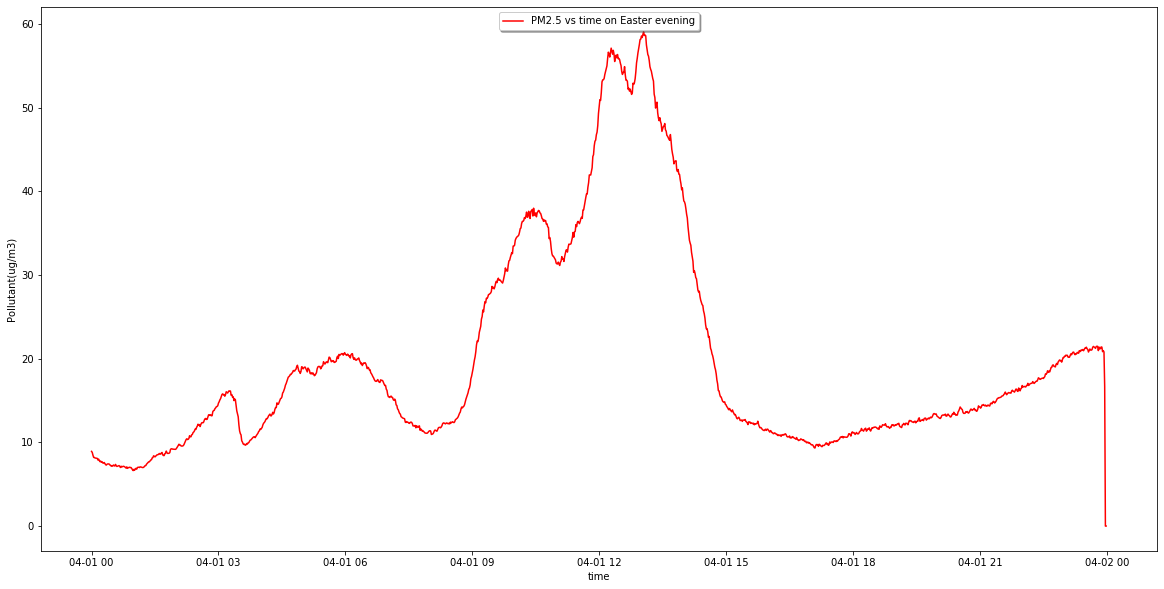

In [5]:
# Visible peak in PM2.5 at Easter
X, Y, xaxis = getSensorInterpolatedData(fields,tstart='2018-04-01 00:00:00',tstop='2018-04-02 00:00:00',fid=4)
plt.plot(xaxis,np.squeeze(np.nanmedian(Y,axis=0)), 'r', label = 'PM2.5 vs time on Easter evening')
left, right = plt.xlim()
plt.xlim(left,right)
plt.xlabel('time')
plt.ylabel('Pollutant(ug/m3)')
legend = plt.legend(loc='upper center', shadow=True)
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [6]:
X, Y, xaxis = getSensorInterpolatedData(fields,tstart='2018-04-01 00:00:00',tstop='2018-04-02 00:00:00',fid=4)

Extracting data over duration  1 days 00:00:00  starting at  2018-04-01 00:00:00
Sampling resolution =  1  minute


In [7]:
nanmedian = np.squeeze(np.nanmedian(Y,axis=0))
diff = np.nanmean(np.square(Y-nanmedian),axis=1)
idx = np.argsort(1*diff)
idx

array([ 61,  30,  37,  50,  16,  18,  28,  92,  35,   2,  51,  27,  38,
        70,  25,  13,  81,  88,   6,  59,  75,  21,  11,  36,  17,  52,
        58,  29,  32,  15,   5,  71,  87,  12,  57,  23,  60,  86,  78,
        42,  45,  41,   1,  19,  53,  79,  39,  82,  34,  44,  55,  73,
        63,  48,  24,  22,  20,  69,  46,  76,  10,  80,  83,  72,  84,
        33,  68,  31,   0,  40,  54,  85,  74,  98,  94, 104, 111, 110,
        93, 103, 102, 109,  96, 101, 108,  95, 105, 107, 100,  99, 106,
        97,  56,  90,   3,   4,   7,  14,  26,  43,  91,  49,  47,  62,
        64,  65,  66,  67,  77,  89, 112, 113,   8,   9], dtype=int64)

In [8]:
sensors_la = readJson('./LEUVENAIRmeta_final.json')
keys = sensors_la.keys()
print(keys)

Note: sensors 8799 and 8827 are repeated in the json file!
dict_keys(['SDS011ID', 'DHTID', 'EXPORT', 'LAT', 'LON', 'STREET', 'POSTALCODE', 'CITY', 'HEIGHT', 'SENSOR_POSITION', 'INDUSTRY', 'WOODSTOVES', 'TRAFFIC', 'SVL', 'NO2_CN'])


In [9]:
anomaly = idx[0:50]
for s in anomaly:
    print(sensors_la['SDS011ID'][s], sensors_la['LAT'][s], sensors_la['LON'][s], sensors_la['STREET'][s])

9589 50.8827 4.6956 Brouwersstraat
8825 50.8728 4.7149 Bierbeekstraat
8839 50.8617 4.7134 Abdijstraat
9561 50.8766 4.6824 Tervuursesteenweg
8797 50.8983 4.734 Schoolbergenstraat
8801 50.8878 4.7232 Gemeentestraat
8821 50.8825 4.6855 Brusselsestraat
11529 50.8859 4.6934 Ridderstraat
8835 50.8923 4.7305 Holsbeeksesteenweg
8765 50.8821 4.719 Ernest Solvaystraat
9563 50.8693 4.7019 Emile Mathieustraat
8819 50.8758 4.7367 Koetsweg
8841 50.9009 4.6957 Watervloedstraat
9609 50.8706 4.698 Schapenstraat
8815 50.87558 4.7275 Schoolstraat
8791 50.8891 4.7445 Meugenslaan
9637 50.8668 4.7105 Geldenaaksebaan
10045 50.8775 4.741 Eugeen Vanhoorenbekelaan
8777 50.8727 4.7118 Dekenstraat
9585 50.8756 4.7145 Dagobertstraat
9623 50.882 4.7174 Martelarenlaan
8807 50.8692 4.7067 Naamsevest
8787 50.881 4.7224 Jozef Wautersstraat
8837 50.8806 4.6978 Amerikalaan
8799 50.8914 4.6965 Kleine Huizenstraat
9565 50.8839 4.7097 Jean Baptiste Van Monsstraat
9583 50.8627 4.6921 Waversebaan
8823 50.9044 4.6942 Herentses

No handles with labels found to put in legend.


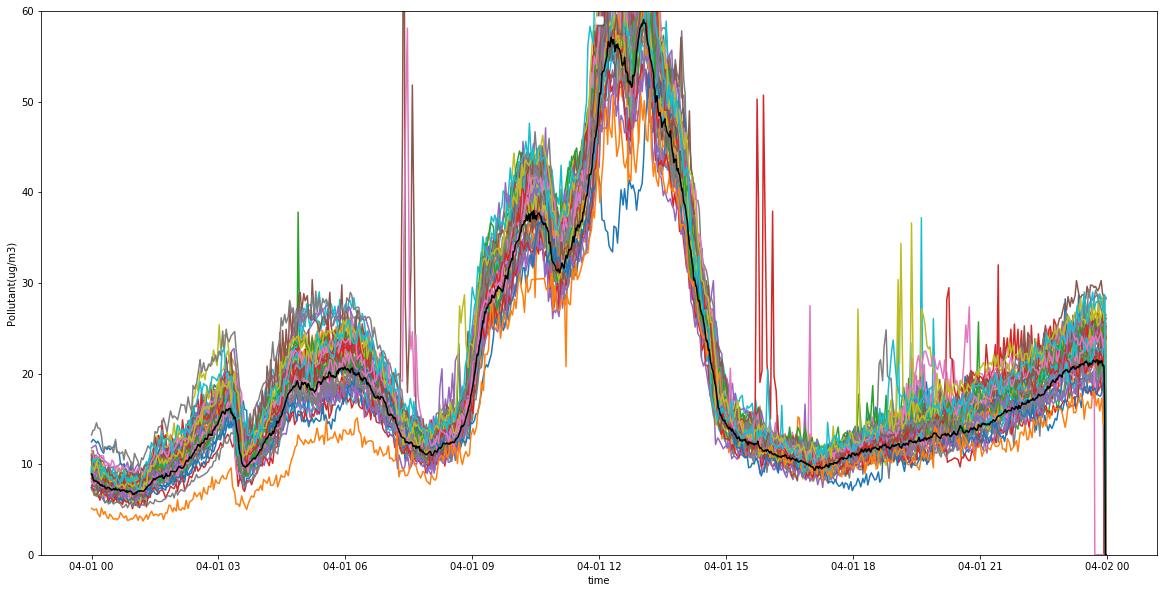

In [10]:
# Visible peak in PM2.5 at Easter
for i in anomaly:
    plt.plot(xaxis, Y[i,:])#, label = sensors_la['STREET'][i])
left, right = plt.xlim()
bottom, top = plt.ylim()
plt.xlim(left,right)
plt.ylim(0,60)
plt.xlabel('time')
plt.ylabel('Pollutant(ug/m3)')
legend = plt.legend(loc='upper center', shadow=True)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.plot(xaxis, nanmedian, 'k', label = 'Median of all sensors')